In [1]:
%pylab inline
import pandas as pd
import scanpy as sc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
Inh_Monkey = sc.read('../data_h5/Inhib_sorted.h5ad')
Inh_Monkey

AnnData object with n_obs × n_vars = 16364 × 19944
    obs: 'batch', 'doublet_score', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'sampleLayers', 'cluster_labels', 'Sex', 'mainMarker'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Sex_colors', 'batch_colors', 'cluster_labels_colors', 'cluster_names', 'hvg', 'leiden', 'leiden_colors', 'mainMarker_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sampleLayers_colors', 'tsne', 'umap'
    obsm: 'X_harmonypca', 'X_pca', 'X_tsne', 'X_umap', 'X_umapharmony', 'X_umapraw'
    varm: 'PCs'
    layers: 'RawCounts'
    obsp: 'connectivities', 'distances'

In [3]:
ad_hodge = sc.read_csv('./dataH5/FI_layer5_count_data.csv')
dataInfo_hodge= pd.read_csv('./dataH5/FI_layer5_sample_information.csv')

In [4]:
ad_hodge.obs_names = dataInfo_hodge['sample_id']

In [5]:
tem_cluster_type_id = dataInfo_hodge['cluster_type_id']
tem_cluster_type_id = tem_cluster_type_id.rename(dataInfo_hodge['sample_id'],axis='index')
ad_hodge.obs['cluster_type_id'] = tem_cluster_type_id

tem_cluster_type_label = dataInfo_hodge['cluster_type_label']
tem_cluster_type_label = tem_cluster_type_label.rename(dataInfo_hodge['sample_id'],axis='index')
ad_hodge.obs['cluster_type_label'] = tem_cluster_type_label

tem_cluster_type_color = dataInfo_hodge['cluster_type_color']
tem_cluster_type_color = tem_cluster_type_color.rename(dataInfo_hodge['sample_id'],axis='index')
ad_hodge.obs['cluster_type_color'] = tem_cluster_type_color

tem_cluster_id = dataInfo_hodge['cluster_id']
tem_cluster_id = tem_cluster_id.rename(dataInfo_hodge['sample_id'],axis='index')
ad_hodge.obs['cluster_id'] = tem_cluster_id

tem_cluster_label = dataInfo_hodge['cluster_label']
tem_cluster_label = tem_cluster_label.rename(dataInfo_hodge['sample_id'],axis='index')
ad_hodge.obs['cluster_label'] = tem_cluster_label

tem_cluster_color = dataInfo_hodge['cluster_color']
tem_cluster_color = tem_cluster_color.rename(dataInfo_hodge['sample_id'],axis='index')
ad_hodge.obs['cluster_color'] = tem_cluster_color

In [6]:
clusterNameDict_hu = dict={
    'cl32_i11_C1QL2_Ndnf.Cxcl14'        :   'Inh LAMP5 CRH',                 # 
    'cl36_i7_NKX2-1_Igtp'               :   'Inh LAMP5 SFRP1',           # 
    'cl13_i24_VIP_Vip.Mybpc1'           :   'Inh VIP',            # 
    'cl1_i74_DCN_Sst.Tacstd2'           :   'Inh SST',           # 
    'cl9_i29_WNT16_Pvalb.Rspo2'         :   'Inh LHX6 WINT16',        #  

    'cl2_e72_ADAMTS9-AS1_L2.Ngb'        :   'Exc LINC00507 CARM1P1',          #  
    'cl7_e33_FRMD6-AS2_L6.Syt17'        :   'Exc THEMIS WISP1',       #  
    'cl19_e19_GABRE_L6.Syt17'           :   'Exc RORB TAGLN2',         #  
    'cl4_e52_CCDC68_L5a.Deptor_Pacsin2' :   'Exc RORB CAPN5',         #  
    'cl12_e24_TRAV8-3_L5a.Syt17'        :   'Exc RORB LIPH',         #      
    'cl6_e36_SLC38A11_L6.Syt17'         :   'Exc RORB SLC38A11',         #  
    'cl26_e13_KL_L6a.Plcxd3'            :   'Exc CTGF ELL3',         #  
    'cl15_e23_ITGA4_L5b.Cdh13'          :   'Exc FEZF2 GABRQ',
    'cl31_e11_SMYD1_L2.3.Otof'          :   'Exc THEMIS SMYD1',         #  
    'cl37_e6_SCUBE1_L6a.Plcxd3'         :   'Exc CTGF LIX1',         #      
    'cl35_e8_CFH_L6a.Plcxd3'            :   'Exc CTGF CFH',         #  
    'cl14_e24_CD200R1L_L6a.Plcxd3'      :   'Exc FEZF2 CASC18',         #      
    'cl18_e20_IL26_L6a.Plcxd3'          :   'Exc FEZF2 GPX3',         #      
}
ad_hodge.obs['clusterName_hodge'] = ad_hodge.obs['cluster_label'].map(clusterNameDict_hu).astype('category')

In [7]:
ad_hodge.obs['cluster_type_label']

sample_id
A01_1_Nuclei_NeuNP_H200_1025_FI_layer5_BCH7        exc
A01_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH5        exc
A01_BCH2_1NeuNP_H200.1025_FI_layer_5           outlier
A02_1_Nuclei_NeuNP_H200_1025_FI_layer5_BCH6        inh
A02_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH5    outlier
                                                ...   
P09_1_Nuclei_NeuNN_H200_1030_FI_layer5_BCH5       glia
P09_BCH2_1NeuNN_H200.1025_FI_layer_5              glia
P10_1_Nuclei_NeuNN_H200_1030_FI_layer5_BCH4       glia
P11_1_Nuclei_NeuNN_H200_1030_FI_layer5_BCH4       glia
P11_1_Nuclei_NeuNN_H200_1030_FI_layer5_BCH5       glia
Name: cluster_type_label, Length: 879, dtype: object

In [8]:
ad_hodge = ad_hodge[ad_hodge[ad_hodge.obs['cluster_type_label']=='inh'].obs_names,]

In [9]:
genes = ad_hodge.var_names[ad_hodge.var_names.isin(Inh_Monkey.var_names)]
genes

Index(['A1BG', 'A2M', 'A2ML1', 'A3GALT2', 'A4GALT', 'AAAS', 'AACS', 'AADAC',
       'AADACL3', 'AADAT',
       ...
       'ZSWIM7', 'ZSWIM8', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDC', 'ZYG11A',
       'ZYG11B', 'ZYX', 'ZZEF1'],
      dtype='object', length=14629)

In [10]:
ad_mk = sc.AnnData(Inh_Monkey.layers['RawCounts'])#, dict(obs_names=Inh_Monkey.obs_names), dict(var_names=Inh_Monkey.var_names) )
ad_mk.obs_names = Inh_Monkey.obs_names
ad_mk.var_names = Inh_Monkey.var_names
ad_mk.obs['batch'] = Inh_Monkey.obs['batch']
ad_mk.obs['leiden'] = Inh_Monkey.obs['leiden']
ad_mk.obs['cluster_labels'] = Inh_Monkey.obs['cluster_labels']
ad_mk.uns['leiden_colors'] = Inh_Monkey.uns['leiden_colors']
ad_mk.obsm['X_umap'] = Inh_Monkey.obsm['X_umap']
ad_mk

AnnData object with n_obs × n_vars = 16364 × 19944
    obs: 'batch', 'leiden', 'cluster_labels'
    uns: 'leiden_colors'
    obsm: 'X_umap'

In [11]:
ad_hu = ad_hodge[:,genes]
ad_hu

View of AnnData object with n_obs × n_vars = 145 × 14629
    obs: 'cluster_type_id', 'cluster_type_label', 'cluster_type_color', 'cluster_id', 'cluster_label', 'cluster_color', 'clusterName_hodge'

In [12]:
ad_mk.obs['species'] = 'monkey'
ad_hu.obs['species'] = 'human'

In [13]:
ad_mk.obs['batch_10X'] = ad_mk.obs['batch']
ad_hu.obs['batch_hodge'] = 'batch_hodge'

In [14]:
adata = ad_mk.concatenate(ad_hu,index_unique = None)
adata.var['mt'] = adata.var_names.isin(["ND1","ND2","COX1","COX2","COX3","ATP6","ATP8","ND3","ND4","ND5","ND6","ND4L","CYTB"])

batch_mk= adata[ad_mk.obs_names].obs['batch_10X']
batch_hu= adata[ad_hu.obs_names].obs['batch_hodge']
batch_mk=batch_mk.astype('string')
batch_hu=batch_hu.astype('string')
batch_all = batch_mk.append(batch_hu)
adata.obs['batch']=batch_all.astype('category')
adata.obs['batch']

adata.obs['species']=adata.obs['species']

In [15]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [16]:
adata.layers['raw_counts'] = adata.X.copy()

### Run scanpy……

In [17]:
# adata.X = adata.layers['raw_counts']

In [18]:
adata.obs['species']

AAACCTGGTGGCGAAT-1-batch-1                     monkey
AAACGGGAGAAACCAT-1-batch-1                     monkey
AAACGGGGTAGCACGA-1-batch-1                     monkey
AAAGATGAGCAGACTG-1-batch-1                     monkey
AAAGATGGTAGAAAGG-1-batch-1                     monkey
                                                ...  
N04_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH4     human
N07_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH5     human
N07_BCH2_1NeuNP_H200.1025_FI_layer_5            human
N10_1_Nuclei_NeuNP_H200_1030_FI_layer5_BCH5     human
N10_BCH2_1NeuNP_H200.1025_FI_layer_5            human
Name: species, Length: 16509, dtype: object

In [19]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

In [20]:
sc.pp.highly_variable_genes(
    adata,
    batch_key="batch",
    flavor="seurat",
    n_top_genes=500,
    subset=True,
    min_mean=0.015, 
    max_mean=10,
    min_disp=0.05
)
adata = adata[:, adata.var.highly_variable]

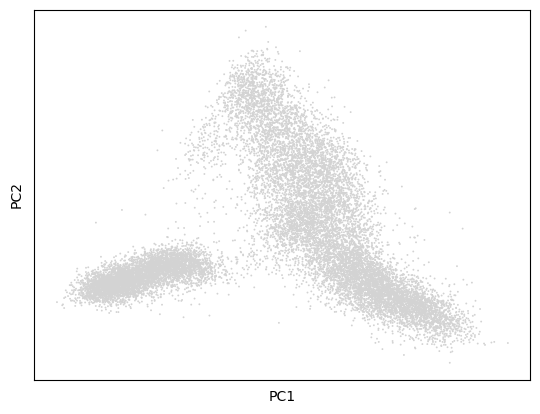

In [21]:
sc.pp.regress_out(adata, ['total_counts'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata)

In [22]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

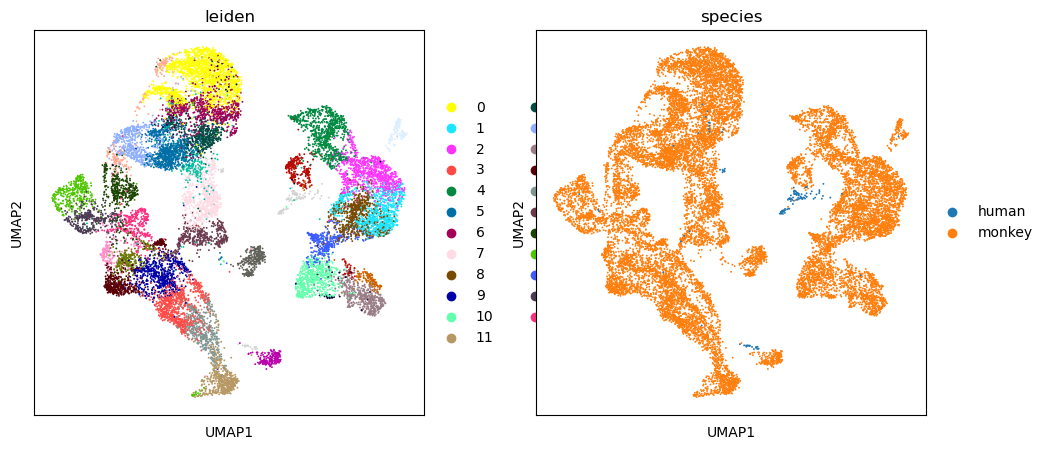

In [23]:
figsize(5,5)
sc.pl.umap(adata,color=['leiden','species'])

### Integrate with harmoney

In [24]:
import harmonypy as hm
ho = hm.run_harmony(adata.obsm['X_pca'], adata.obs, ['batch','species'])

adata.obsm['X_harmonypca'] = ho.Z_corr.T
sc.pp.neighbors(adata, use_rep='X_harmonypca')

adata.obsm['X_umapraw'] = adata.obsm['X_umap']
sc.tl.umap(adata)
adata.obsm['X_umapharmony'] = adata.obsm['X_umap']

2025-03-01 12:33:27,458 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-01 12:33:36,278 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-01 12:33:36,347 - harmonypy - INFO - Iteration 1 of 10
2025-03-01 12:33:42,680 - harmonypy - INFO - Iteration 2 of 10
2025-03-01 12:33:49,023 - harmonypy - INFO - Iteration 3 of 10
2025-03-01 12:33:58,239 - harmonypy - INFO - Iteration 4 of 10
2025-03-01 12:34:07,172 - harmonypy - INFO - Iteration 5 of 10
2025-03-01 12:34:09,981 - harmonypy - INFO - Iteration 6 of 10
2025-03-01 12:34:12,541 - harmonypy - INFO - Iteration 7 of 10
2025-03-01 12:34:15,022 - harmonypy - INFO - Iteration 8 of 10
2025-03-01 12:34:22,204 - harmonypy - INFO - Iteration 9 of 10
2025-03-01 12:34:24,783 - harmonypy - INFO - Converged after 9 iterations


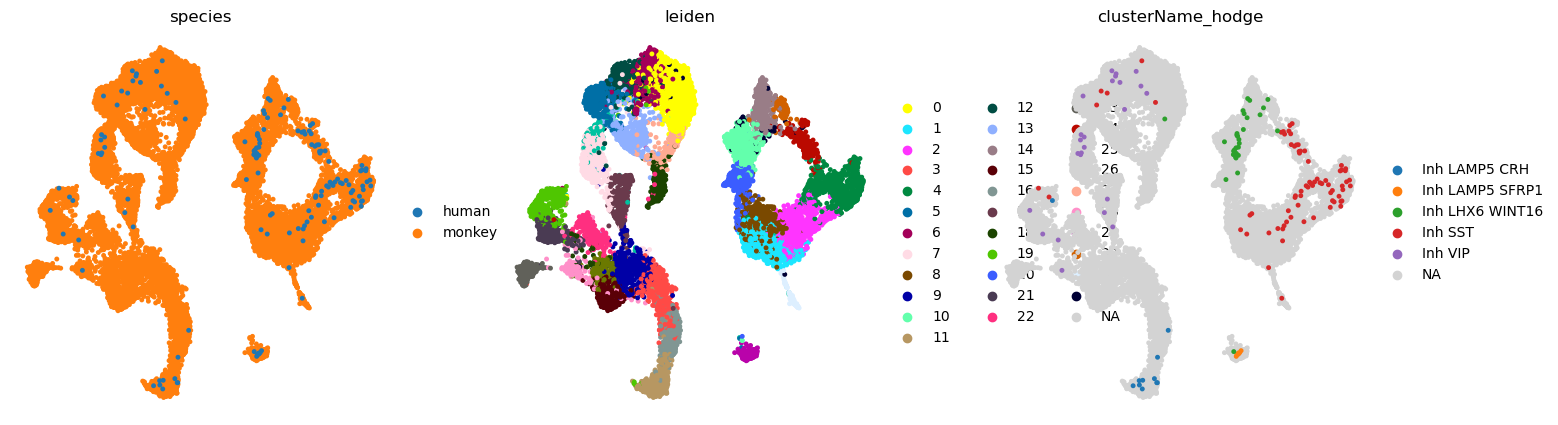

In [25]:
figsize(5,5)
sc.pl.umap(adata, color=['species','leiden','clusterName_hodge'],ncols=3, frameon=False, legend_loc='right margin', size=50)

# Comparision heatmap plotting

In [26]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [27]:
import sys
sys.path.append('../tools')
from two_species_heatmap import *

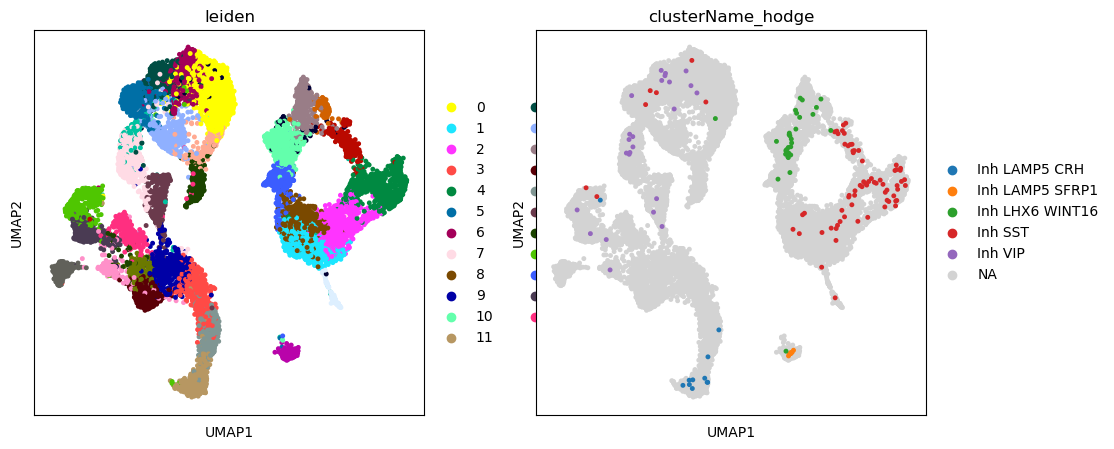

In [28]:
sc.pl.umap(adata, color = ['leiden','clusterName_hodge'],size=50)

In [29]:
sc.pp.neighbors(adata,  metric='euclidean',use_rep = 'X_harmonypca' )
sc.tl.louvain(adata, resolution = 1.0, key_added = 'louvain')
adata.obs['louvain1_0'] = adata.obs['louvain']

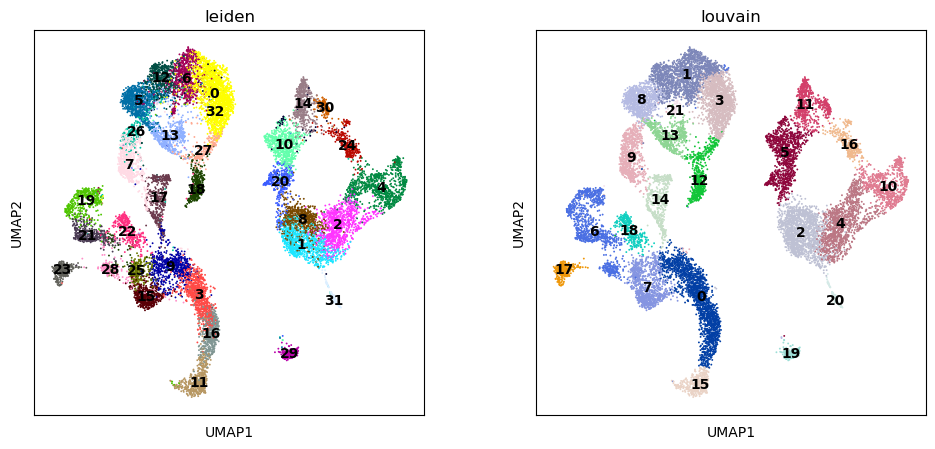

In [30]:
ad_1 = adata[adata.obs['species'].isin(['monkey']),:]
figsize(5,5)
sc.pl.umap(ad_1, color = ['leiden','louvain'], legend_loc = 'on data')

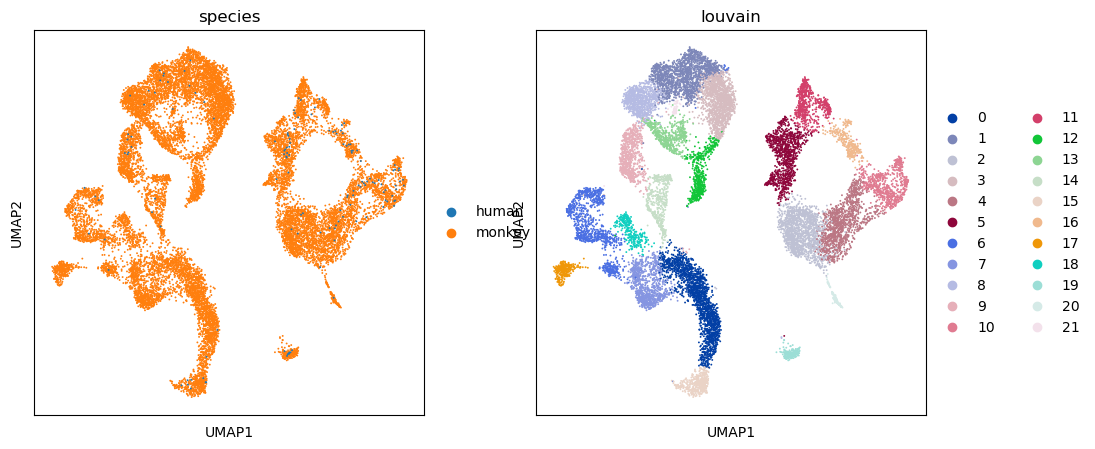

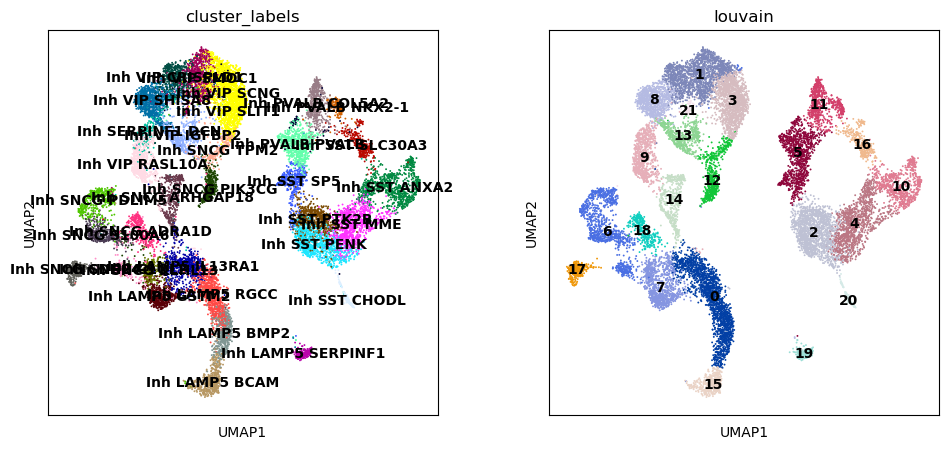

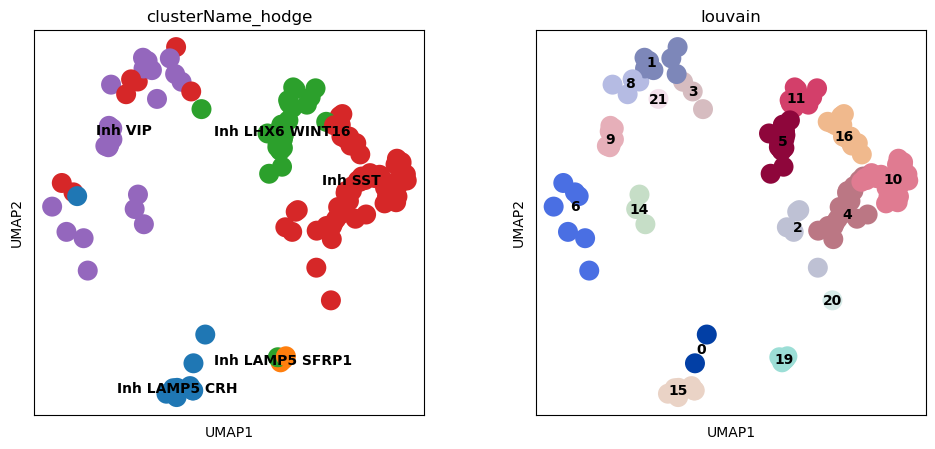

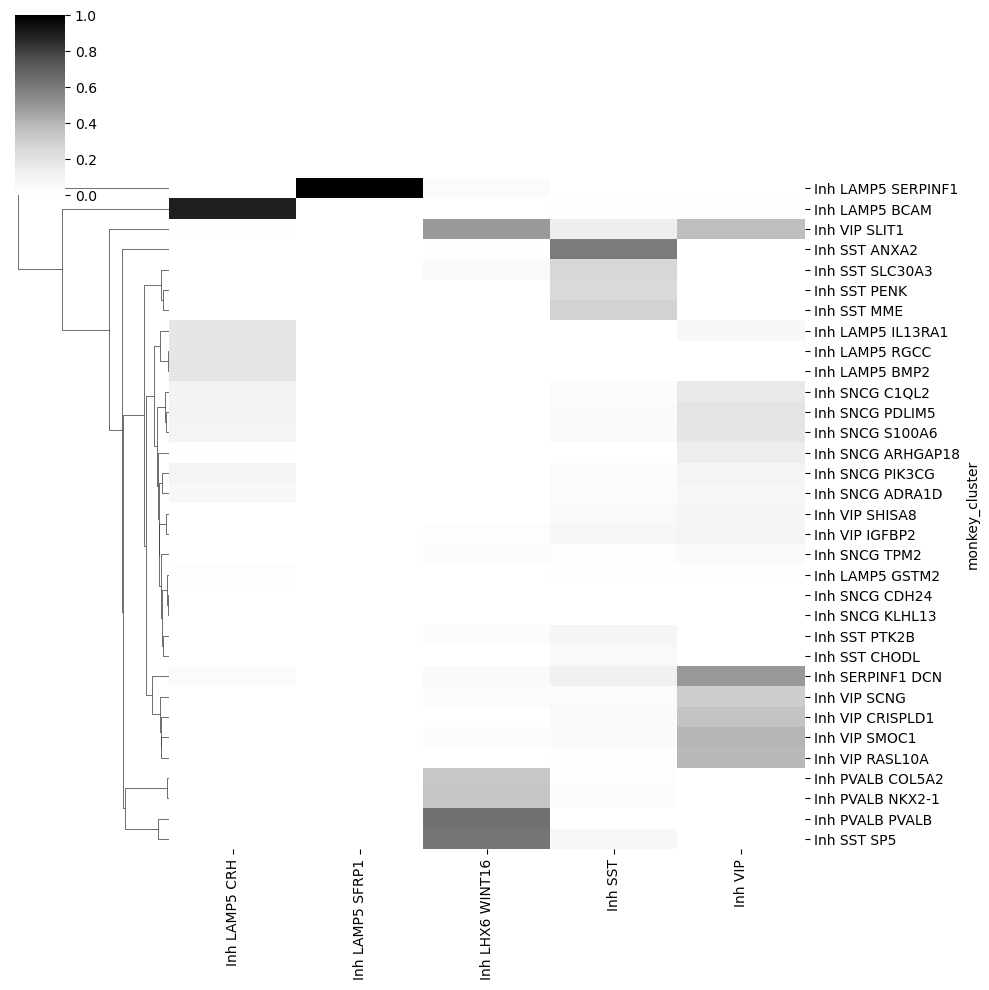

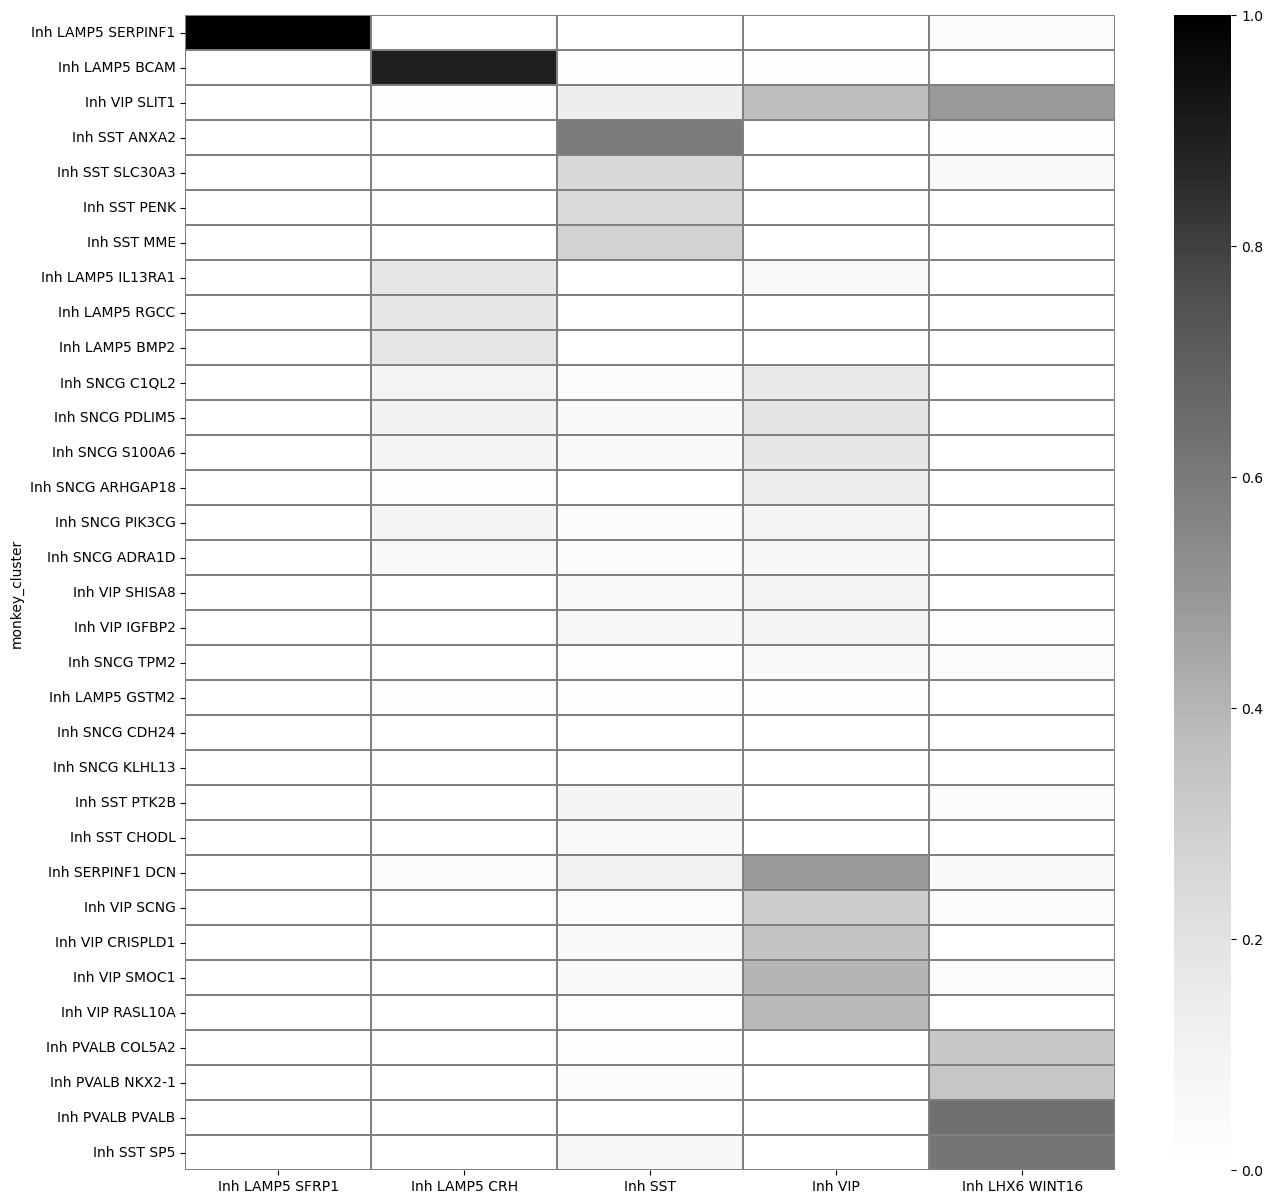

In [31]:
plot_matrix_mk_vs_hu_lovain_1_0 = two_species_heatmap(adata, species_1 = 'monkey', species_2 = 'human',\
                species_1_key = 'cluster_labels', species_2_key = 'clusterName_hodge',\
                louvain = 1.0,figure_path = 'neurons_heatmap_cmp.png')

In [33]:
plot_matrix_mk_vs_hu_lovain_1_0.index

Index(['Inh LAMP5 SERPINF1', 'Inh LAMP5 BCAM', 'Inh VIP SLIT1',
       'Inh SST ANXA2', 'Inh SST SLC30A3', 'Inh SST PENK', 'Inh SST MME',
       'Inh LAMP5 IL13RA1', 'Inh LAMP5 RGCC', 'Inh LAMP5 BMP2',
       'Inh SNCG C1QL2', 'Inh SNCG PDLIM5', 'Inh SNCG S100A6',
       'Inh SNCG ARHGAP18', 'Inh SNCG PIK3CG', 'Inh SNCG ADRA1D',
       'Inh VIP SHISA8', 'Inh VIP IGFBP2', 'Inh SNCG TPM2', 'Inh LAMP5 GSTM2',
       'Inh SNCG CDH24', 'Inh SNCG KLHL13', 'Inh SST PTK2B', 'Inh SST CHODL',
       'Inh SERPINF1 DCN', 'Inh VIP SCNG', 'Inh VIP CRISPLD1', 'Inh VIP SMOC1',
       'Inh VIP RASL10A', 'Inh PVALB COL5A2', 'Inh PVALB NKX2-1',
       'Inh PVALB PVALB', 'Inh SST SP5'],
      dtype='object', name='monkey_cluster')

In [34]:
plot_matrix_mk_vs_hu_lovain_1_0.columns

Index(['Inh LAMP5 SFRP1', 'Inh LAMP5 CRH', 'Inh SST', 'Inh VIP',
       'Inh LHX6 WINT16'],
      dtype='object')

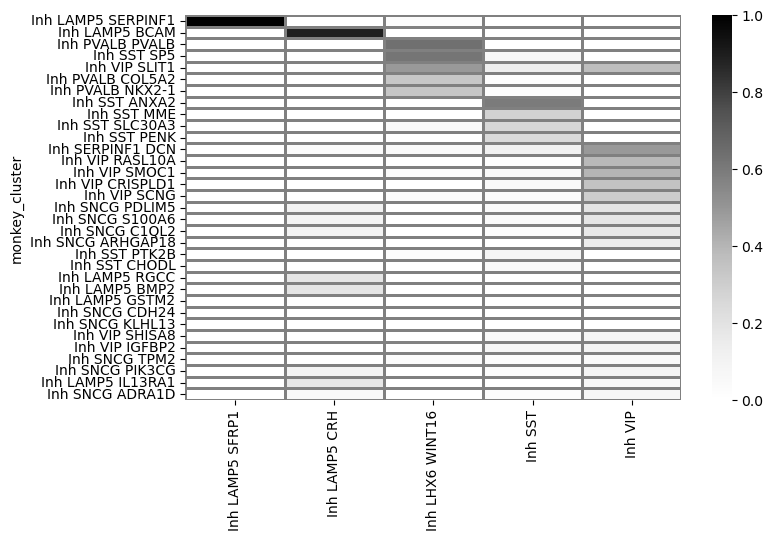

In [35]:
# re-assign the index and columns
ind_order = ['Inh LAMP5 SERPINF1', 'Inh LAMP5 BCAM', 
             'Inh PVALB PVALB', 'Inh SST SP5', 'Inh VIP SLIT1', 'Inh PVALB COL5A2', 'Inh PVALB NKX2-1', 
             'Inh SST ANXA2', 'Inh SST MME', 'Inh SST SLC30A3', 'Inh SST PENK', 
             'Inh SERPINF1 DCN','Inh VIP RASL10A', 'Inh VIP SMOC1', 'Inh VIP CRISPLD1',
             'Inh VIP SCNG', 'Inh SNCG PDLIM5', 'Inh SNCG S100A6', 'Inh SNCG C1QL2', 'Inh SNCG ARHGAP18', 
             'Inh SST PTK2B', 'Inh SST CHODL', 'Inh LAMP5 RGCC', 'Inh LAMP5 BMP2', 'Inh LAMP5 GSTM2', 'Inh SNCG CDH24',
             'Inh SNCG KLHL13', 'Inh VIP SHISA8', 'Inh VIP IGFBP2',
             'Inh SNCG TPM2', 'Inh SNCG PIK3CG', 'Inh LAMP5 IL13RA1', 'Inh SNCG ADRA1D']

col_order = ['Inh LAMP5 SFRP1', 'Inh LAMP5 CRH', 'Inh LHX6 WINT16', 'Inh SST', 'Inh VIP',]
plot_matrix_mk_vs_hu_lovain_1_0 = plot_matrix_mk_vs_hu_lovain_1_0.reindex(index=ind_order, columns=col_order)

plt.figure(figsize = (8,5))
sns_plot = sns.heatmap(plot_matrix_mk_vs_hu_lovain_1_0, cmap='Greys', cbar=True, xticklabels=1,yticklabels=1, linewidth = 1, linecolor = 'gray')

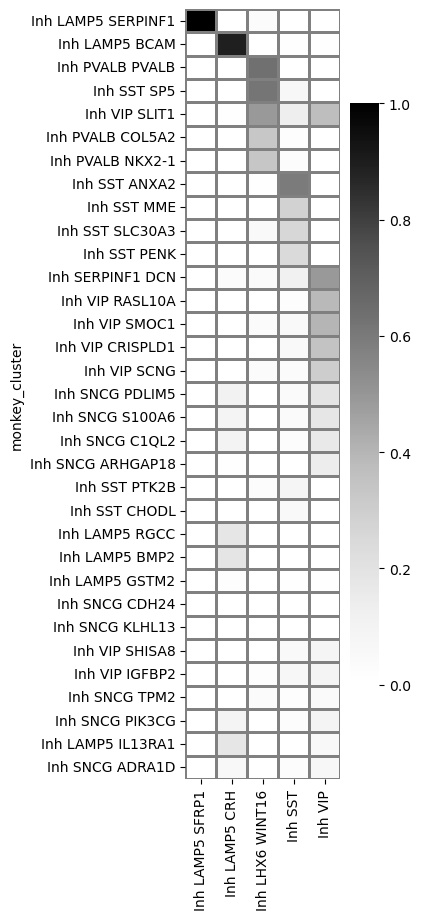

In [36]:
plt.figure(figsize = (2.5,10))
sns_plot = sns.heatmap(plot_matrix_mk_vs_hu_lovain_1_0, cmap='Greys', cbar=True, xticklabels=1,yticklabels=1, linewidth = 1, linecolor = 'gray')
plt.savefig('figures/cmpMatrix_mk_vs_hu_Inter_500VirableGenes_inh.pdf',dpi = 600, )

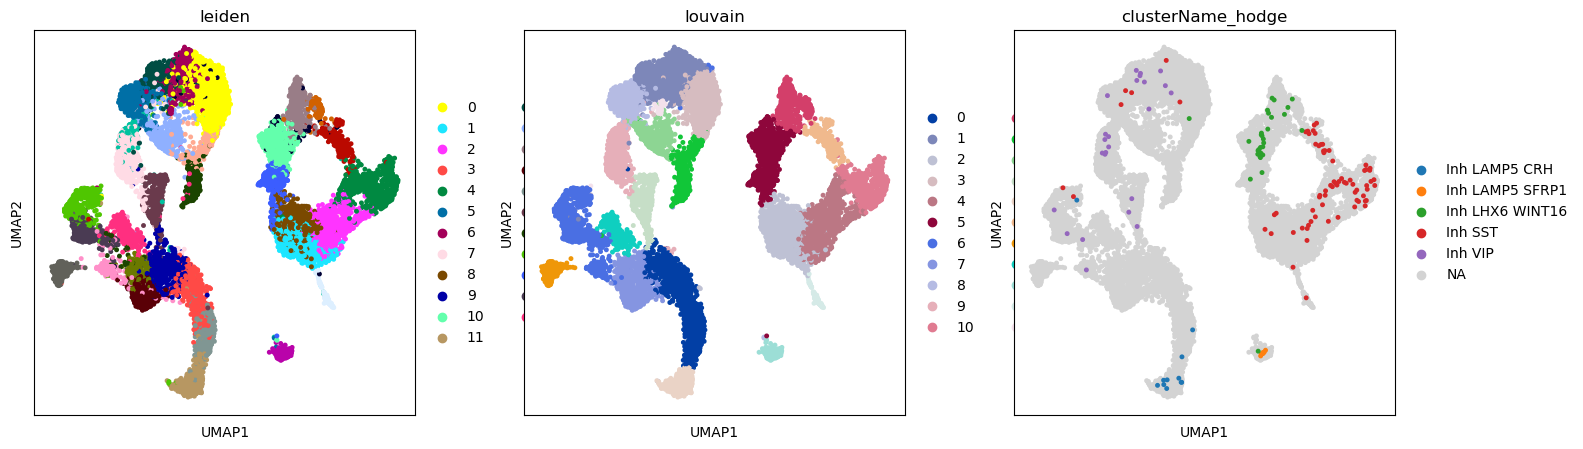

In [37]:
sc.pl.umap(adata, color = ['leiden','louvain','clusterName_hodge'],size=50)

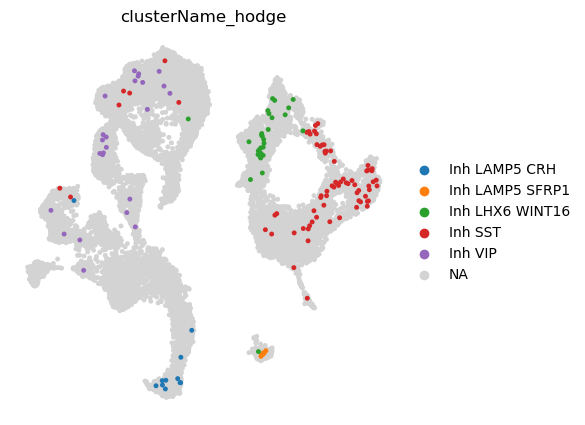

In [38]:
figsize(5,5)
sc.pl.umap(adata, color = ['clusterName_hodge'],size=50,frameon='',save='humanFIneuronsMapping_to_10XInh.pdf')